In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import cm
import matplotlib as mpl

In [2]:
mpl.rcParams.update({
    "font.family":        "sans-serif",
    "font.sans-serif":    ["Arial", "DejaVu Sans", "Calibri"],
    "font.size":          9.0,   # global font size
    "axes.titlesize":     10.0,  # panel titles
    "axes.labelsize":     9.5,   # axis labels
    "xtick.labelsize":    8.5,
    "ytick.labelsize":    8.5,
    "legend.fontsize":    7.0,

    "axes.linewidth":     0.8,
    "xtick.major.size":   3.5,
    "xtick.major.width":  0.8,
    "ytick.major.size":   3.5,
    "ytick.major.width":  0.8,
    "xtick.minor.size":   2.0,
    "xtick.minor.width":  0.6,
    "ytick.minor.size":   2.0,
    "ytick.minor.width":  0.6,
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,

    "xtick.direction":    "out",
    "ytick.direction":    "out",

    "xtick.major.pad":    3,
    "ytick.major.pad":    3,
    "axes.labelpad":      4,
    "axes.titlepad":      5,

    "lines.linewidth":    1.0,
    "axes.grid":          False,

    "savefig.dpi":        300,
    "savefig.bbox":       "tight",
})

In [7]:
info = pd.read_excel("./SiteInfo.xlsx")     # needs 'site' column
htop_df = pd.read_csv("HTOP.csv")          # columns: Site_htop, ETH_htop, Site_Tree, GFCC

In [13]:
n_site = len(info["site"])
tab_colors = mpl.colormaps['tab20'] #cm.get_cmap("tab20", 20)
site_colors = []
for i in range(n_site):
    if i < 20:
        site_colors.append(tab_colors(i))
    else:
        site_colors.append("peru")

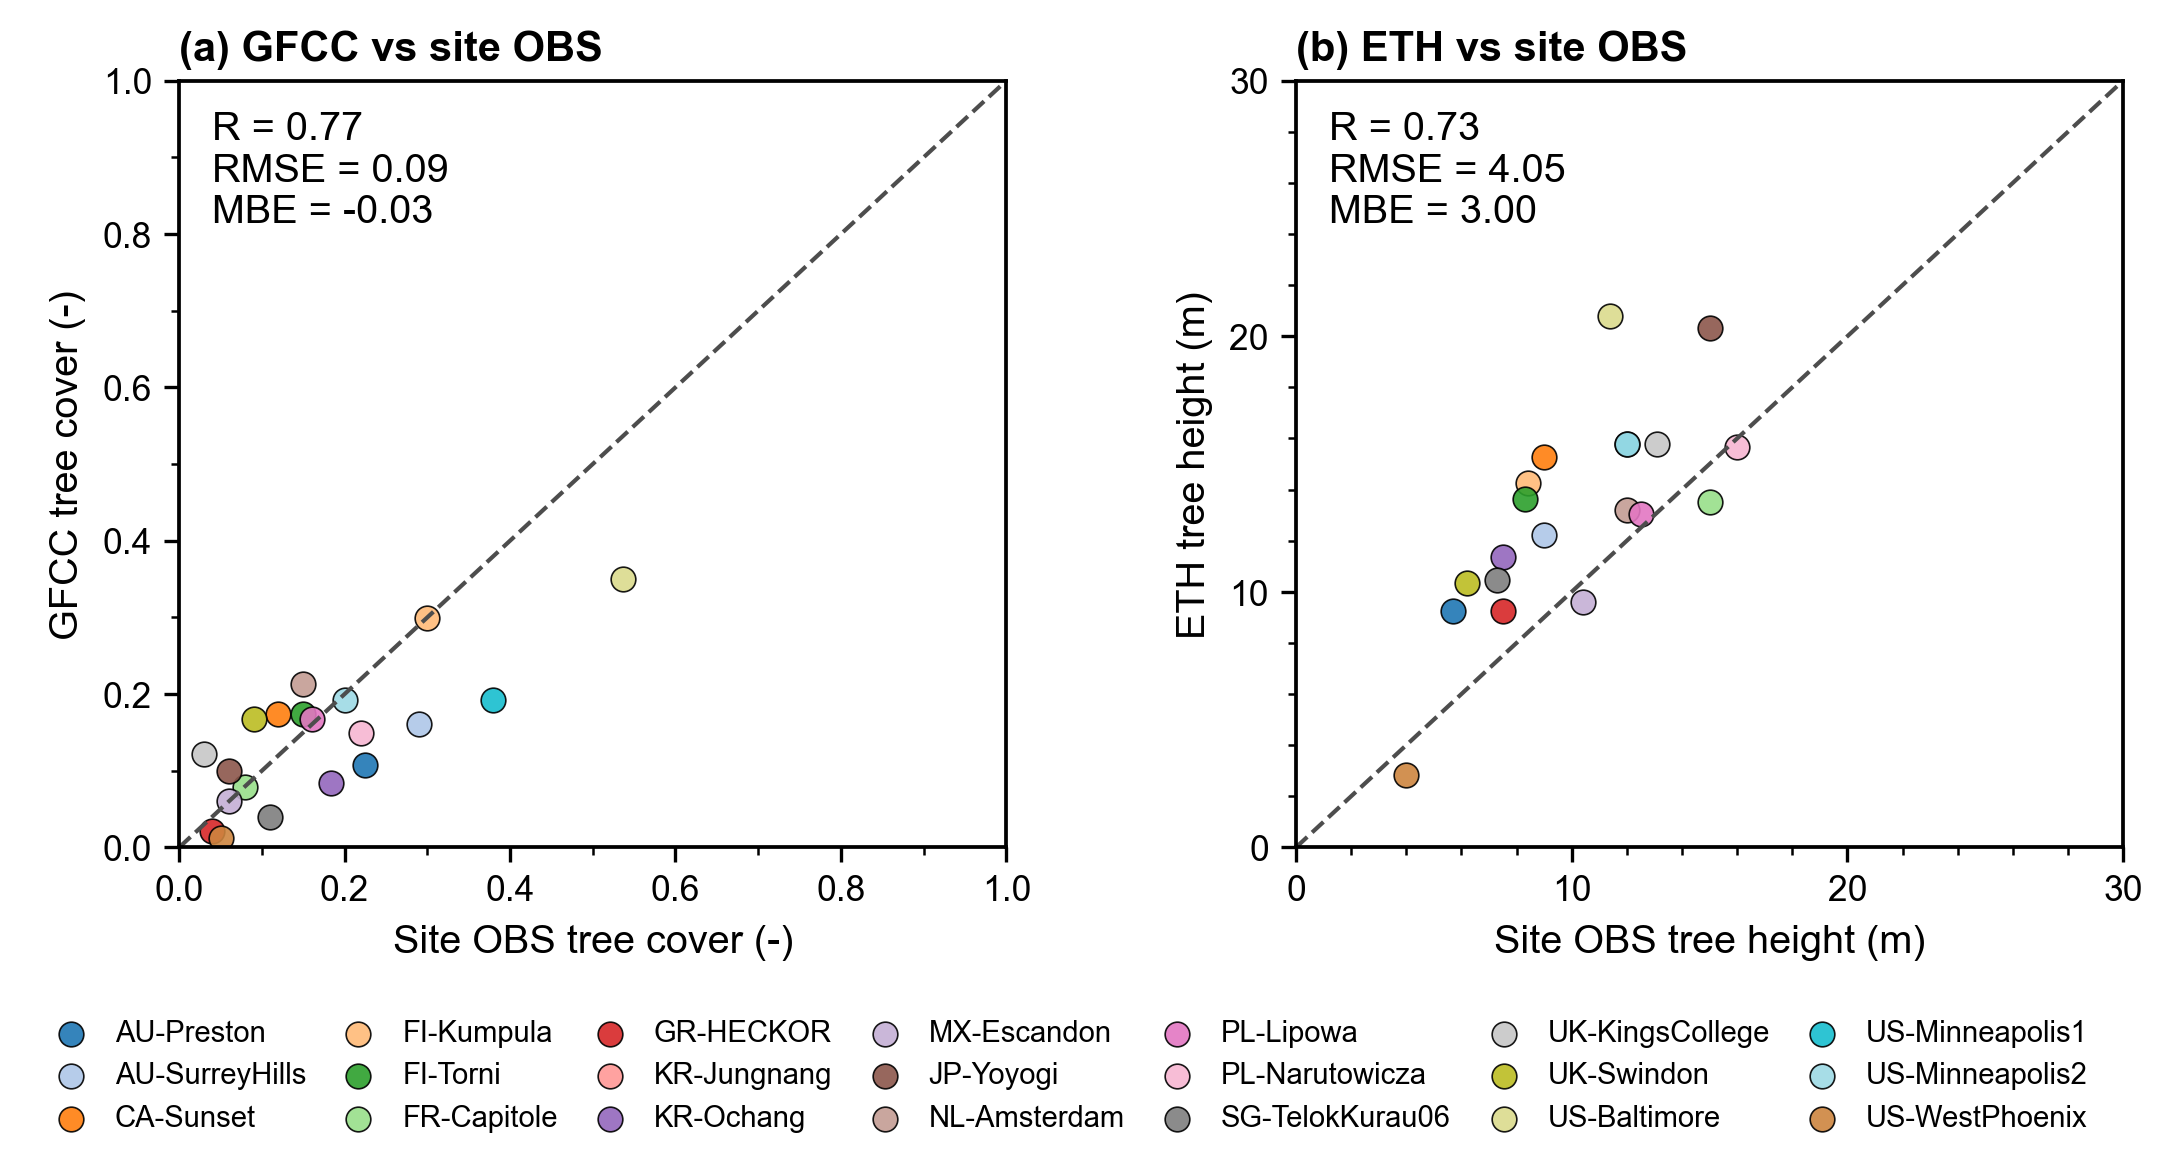

In [15]:
fig = plt.figure(figsize=(7.2, 3.6), dpi=300)

for j in range(2):
    ax = plt.subplot(1, 2, j + 1)

    all_obs = []
    all_eth = []

    # ---- scatter for each site ----
    for i in range(n_site):
        site_name = info["site"][i]

        if j == 1:
            x_val = htop_df["Site_htop"][i]
            y_val = htop_df["ETH_htop"][i]
        else:
            x_val = htop_df["Site_Tree"][i]
            y_val = htop_df["GFCC"][i]

        if site_name=='KR-Jungnang':
            x_val = np.nan
            y_val = np.nan

        all_obs.append(x_val)
        all_eth.append(y_val)

        ax.scatter(
            x_val,
            y_val,
            s=35,                    # marker area
            c=[site_colors[i]],
            edgecolor="black",
            linewidths=0.4,
            alpha=0.9,
            label=site_name,
        )

    all_obs = np.asarray(all_obs)
    all_eth = np.asarray(all_eth)

    # ---- metrics (R, RMSE, MBE) ----
    mask = ~np.isnan(all_obs)
    x = all_obs[mask]
    y = all_eth[mask]

    r1    = np.corrcoef(y, x)[0, 1]
    rmse1 = np.sqrt(np.mean((y - x) ** 2))
    mae1  = np.mean(y - x)

    stats_text = f"R = {r1:.2f}\nRMSE = {rmse1:.2f}\nMBE = {mae1:.2f}"
    ax.text(
        0.04, 0.96,
        stats_text,
        ha="left", va="top",
        transform=ax.transAxes,
        fontsize=9.5,
        bbox=dict(
            facecolor="white",
            edgecolor="none",
            alpha=0.8,
            boxstyle="round,pad=0.2",
        ),
    )

    # ---- axis labels, titles, ticks ----
    if j == 1:
        ax.set_ylabel("ETH tree height (m)")
        ax.set_xlabel("Site OBS tree height (m)")
        ax.set_title("(b) ETH vs site OBS", loc="left", fontweight="bold")

        ax.set_xlim(0, 30)
        ax.set_ylim(0, 30)
        ax.plot((0, 30), (0, 30), ls="--", c="0.3", linewidth=1.0)

        ax.tick_params(axis="x", which="major", top=False)
        ax.tick_params(axis="x", which="minor", top=False)
        ax.xaxis.set_major_locator(MultipleLocator(10))
        ax.xaxis.set_minor_locator(MultipleLocator(2))

        ax.tick_params(axis="y", which="major", right=False)
        ax.tick_params(axis="y", which="minor", right=False)
        ax.yaxis.set_major_locator(MultipleLocator(10))
        ax.yaxis.set_minor_locator(MultipleLocator(2))

    else:
        ax.set_ylabel("GFCC tree cover (-)")
        ax.set_xlabel("Site OBS tree cover (-)")
        ax.set_title("(a) GFCC vs site OBS", loc="left", fontweight="bold")

        ax.set_xlim(0, 1.)
        ax.set_ylim(0, 1.)
        ax.plot(
            (0, 1.), (0, 1.),
            ls="--", c="0.3", linewidth=1.0, label="1:1 line"
        )

        ax.tick_params(axis="x", which="major", top=False)
        ax.tick_params(axis="x", which="minor", top=False)
        ax.xaxis.set_major_locator(MultipleLocator(0.2))
        ax.xaxis.set_minor_locator(MultipleLocator(0.1))

        ax.tick_params(axis="y", which="major", right=False)
        ax.tick_params(axis="y", which="minor", right=False)
        ax.yaxis.set_major_locator(MultipleLocator(0.2))
        ax.yaxis.set_minor_locator(MultipleLocator(0.1))

    # Thin but visible spines
    for loc in ["left", "right", "top", "bottom"]:
        ax.spines[loc].set_linewidth(0.9)

# =============== global legend ===============
handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))  # remove duplicates (same labels)

fig.subplots_adjust(wspace=0.35, left=0.09, right=0.99, top=0.94, bottom=0.23)

fig.legend(
    unique.values(),
    unique.keys(),
    loc="lower center",
    ncol=7,
    frameon=False,
    bbox_to_anchor=(0.5, -0.05),
    handletextpad=0.5,
    columnspacing=0.8,
    borderaxespad=0.2,
)

plt.savefig("./Figure6.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.show()